In [5]:
import requests
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import urllib.request
from selenium import webdriver
import pandas as pd
import csv
import time
import operator
import re

In [6]:
#m_url ="https://www.nytimes.com/topic/subject/construction-accidents"
m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20200229&query=%22construction%22%20accident&sort=best&startDate=20000101"

In [7]:
session = requests.Session()
req=session.get(m_url) #default is s_url
soup = BeautifulSoup(req.text, 'html.parser')

#stream-panel > div.css-13mho3u > ol > li:nth-child(2) > div > div.css-1l4spti > a
#stream-panel > div.css-13mho3u > ol > li:nth-child(1) > div > div.css-1l4spti > a


In [240]:

chrome_options = webdriver.ChromeOptions
#chrome_options.add_argument("--incognito")
driver = webdriver.Chrome(executable_path='/Users/macbookpro/Desktop/Project/Construction_analysis/chromedriver')

link = []
driver.get(m_url)
time.sleep(3)
for i in range(100) :
    a = driver.page_source
    b = BeautifulSoup(a, 'html.parser')
    #stream-panel > div.css-13mho3u > ol > li:nth-child(1) > div > div.css-1l4spti > a
    #stream-panel > div.css-13mho3u > ol > li > div > div.css-1l4spti > a
    #site-content > div > div:nth-child(2) > div.css-46b038 > ol > li:nth-child(1) > div > div > div > a
    c = b.select('#site-content > div >div>div> ol >li> div > div > div > a')
    
    for j in range(len(c)) :
        if c[j].attrs['href'] not in link :
            link.append(c[j].attrs['href'])
        else :
            pass
    
    driver.find_element_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/div/button').click()
    time.sleep(3)

#link

In [246]:
link_source = link 

a_link = link

print(len(a_link))


1000


In [247]:
diff_link = []

#delete unsupported news 
for i in range (len(a_link)) :
    print(a_link[i])
    if a_link[i][1] != '2':
        
        diff_link.append(a_link[i])
            
    else : 
        continue

for j in range(len(diff_link)):
    if diff_link[j] in a_link:
        a_link.remove(diff_link[j])
        
#a_link


/2020/02/17/nyregion/construction-deaths-latinos-nyc.html?searchResultPosition=1
/2020/01/30/nyregion/nyc-scaffolding-building-facades.html?searchResultPosition=2
/2019/11/22/nyregion/nyc-dob-surprise-inspectors.html?searchResultPosition=3
/2019/11/29/us/hard-rock-hotel-worker-immigration.html?searchResultPosition=4
/2007/09/13/nyregion/13mbrfs-DEATHS.html?searchResultPosition=5
/2015/06/03/nyregion/fatal-construction-accidents-are-rising-in-new-york.html?searchResultPosition=6
/2006/11/22/nyregion/fatal-construction-accidents-in-the-city-rise-sharply-over-12.html?searchResultPosition=7
/2006/11/22/nyregion/22construct.html?searchResultPosition=8
/2007/05/05/nyregion/05cave.html?searchResultPosition=9
https://cityroom.blogs.nytimes.com/2008/04/29/more-construction-accidents-2-workers-critically-injured/?searchResultPosition=10
/2002/08/27/nyregion/city-allows-work-to-resume-at-construction-accident-site.html?searchResultPosition=11
https://cityroom.blogs.nytimes.com/2007/08/23/new-scaf

In [248]:
## This is main source for analyzing article

class ArticleInfo():
    
    def __init__(self, s_url) :
        
        session = requests.Session()
        req=session.get(s_url)
        self.soup = BeautifulSoup(req.text, 'html.parser')
    
    
    def article_body(self) :
        body = self.soup.find('div', {'class' : 'StoryBodyCompanionColumn'})
        finalContent =''
    
        if body is not None :
            for itcontents in self.soup.findAll('p'):
                if itcontents == None :
                    continue
                content = itcontents.getText()
                content = re.sub(r"\n+", "", content)
                finalContent +=content
        else :
            return False
        
        return finalContent

##reference: https://github.com/subhendusethi/nytimes-article-crawler/blob/master/crawler/nytimescrawler.py    

    def article_title(self):
        titles = self.soup.select('title',{"data-rh":"true"})
        for title in titles:
            title = title.getText()
            break
        return title

    def article_date(self) :
  
        date = self.soup.find('li',{'class':'date'})
        if date != None :
            date = date.getText()
            
        else :
            date = self.soup.find('meta',{'name':'pdate'})
            if date !=None :
                date = date.get('content')
                if date !=None :
                    date = str(date)
                else:
                    none= "none"
                    datelist.append(none)
                
        return date

 

In [249]:
titles =[]
bodies =[]
datelist=[]

for s_url in a_link :
    s_url = 'https://www.nytimes.com'+s_url
    ob = ArticleInfo(s_url)
    
    body =ob.article_body()
    bodies.append(body)
    
    date = ob.article_date()
    datelist.append(date)
    
    title = ob.article_title()
    titles.append(title)

In [174]:
#bodies

['AdvertisementSupported byConstruction workers, many of them undocumented, continue to die on the job in New York City, despite safety regulations.By Andrea Salcedo and Derek M. NormanA week before the accident, Segundo Huerta’s wife said, her husband had complained to her that the boss at the Bronx construction site where he was working was pressuring his laborers, berating them for working too slowly.Mr. Huerta’s wife, Maria Guazhco, said her husband had told her that after 17 years with the company, he would try to find another job. Nonetheless, she said, he returned to the site the next week.“And then,” Ms. Guazhco, 39, said, “everything collapsed.”Mr. Huerta, 46, was killed on Aug. 27 after the third floor of the building where he was working crumbled, burying and trapping his body under hundreds of pounds of rubble.He was one of 12 people, 10 of them Latino, who died in construction-related accidents last year, according to preliminary data from the New York Committee for Occupa

### Start Tokenize words with nltk

In [172]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.probability import ConditionalFreqDist
from gensim.models import Word2Vec


In [250]:

#1. make lower case, regulazation
l_bodies=[]
for body in bodies :
    
    body = str(body).lower()
    l_bodies.append(body)

    
#2. removing stop words, tokenize with postagging
stop_words = set(stopwords.words('english'))

token_sentence = []
for words in l_bodies:
    word_tokens= word_tokenize(words)
    filter_sentence = [fw for fw in word_tokens if not fw in stop_words]
    #filter_sentence = nltk.pos_tag(filter_sentence)
    token_sentence.append(filter_sentence)
    
#token_sentence
#print(l_bodies)



In [426]:
#print(sentences)
model = Word2Vec(token_sentence, size = 400, window=3, min_count=70, workers=3, sg=1)

In [429]:
model.similarity('fall','death')  ## similarity between words

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.55612683

In [430]:
model.most_similar('fire')[:20]

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('police', 0.7380756139755249),
 ('emergency', 0.7217724919319153),
 ('firefighters', 0.7152314782142639),
 ('remained', 0.7043880224227905),
 ('scene', 0.6913915872573853),
 ('evening', 0.6892529129981995),
 ('medical', 0.6647104620933533),
 ('said.the', 0.6646274924278259),
 ('head', 0.6616230010986328),
 ('sent', 0.6565349102020264)]

In [325]:
data ={"Date":datelist, "Title": titles, "Body":bodies,"Link" :a_link}
df= pd.DataFrame(data)

df['Date']=pd.to_datetime(df.Date)
df.sort_values(by='Date')
df.to_excel('result_0301.xlsx')
df.to_csv('/Users/macbookpro/Desktop/Project/Cosntruction_article/reslut_0301.csv', index= False,)


ModuleNotFoundError: No module named 'openpyxl'

In [38]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from umap import UMAP

In [441]:
reducer = UMAP(n_neighbors = 20, min_dist =0.1, n_components = 2, verbose = True)

In [442]:
len(token_sentence)

860

In [443]:
X = model[model.wv.vocab]

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [444]:
X_l = list(model.wv.vocab)

In [445]:
X.shape

(975, 400)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.25, n_components=2, n_epochs=None,
     n_neighbors=20, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Tue Mar 17 14:10:52 2020 Finding Nearest Neighbors
Tue Mar 17 14:10:52 2020 Finished Nearest Neighbor Search
Tue Mar 17 14:10:52 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Mar 17 

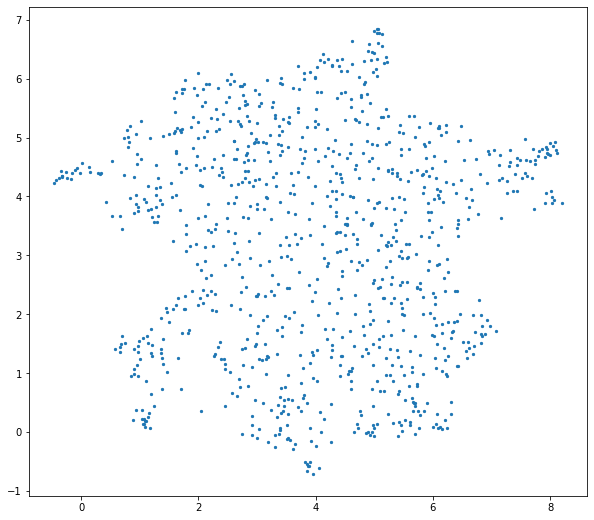

In [435]:
cluster_embedding = reducer.fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:,0], cluster_embedding[:,1],s=5,cmap='tab10')

In [446]:
len(X)

975

In [447]:
df = pd.DataFrame(cluster_embedding)

In [448]:
import pandas as pd

In [449]:
df

,0,1
0,-0.459730,4.221291
1,4.025987,0.864304
2,4.510435,3.110514
3,4.338616,3.370811
4,5.434273,5.218404
...,...,...
970,4.990246,6.442211
971,6.195499,2.608235
972,4.498327,3.345964
973,5.035669,6.160697


/Users/macbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)


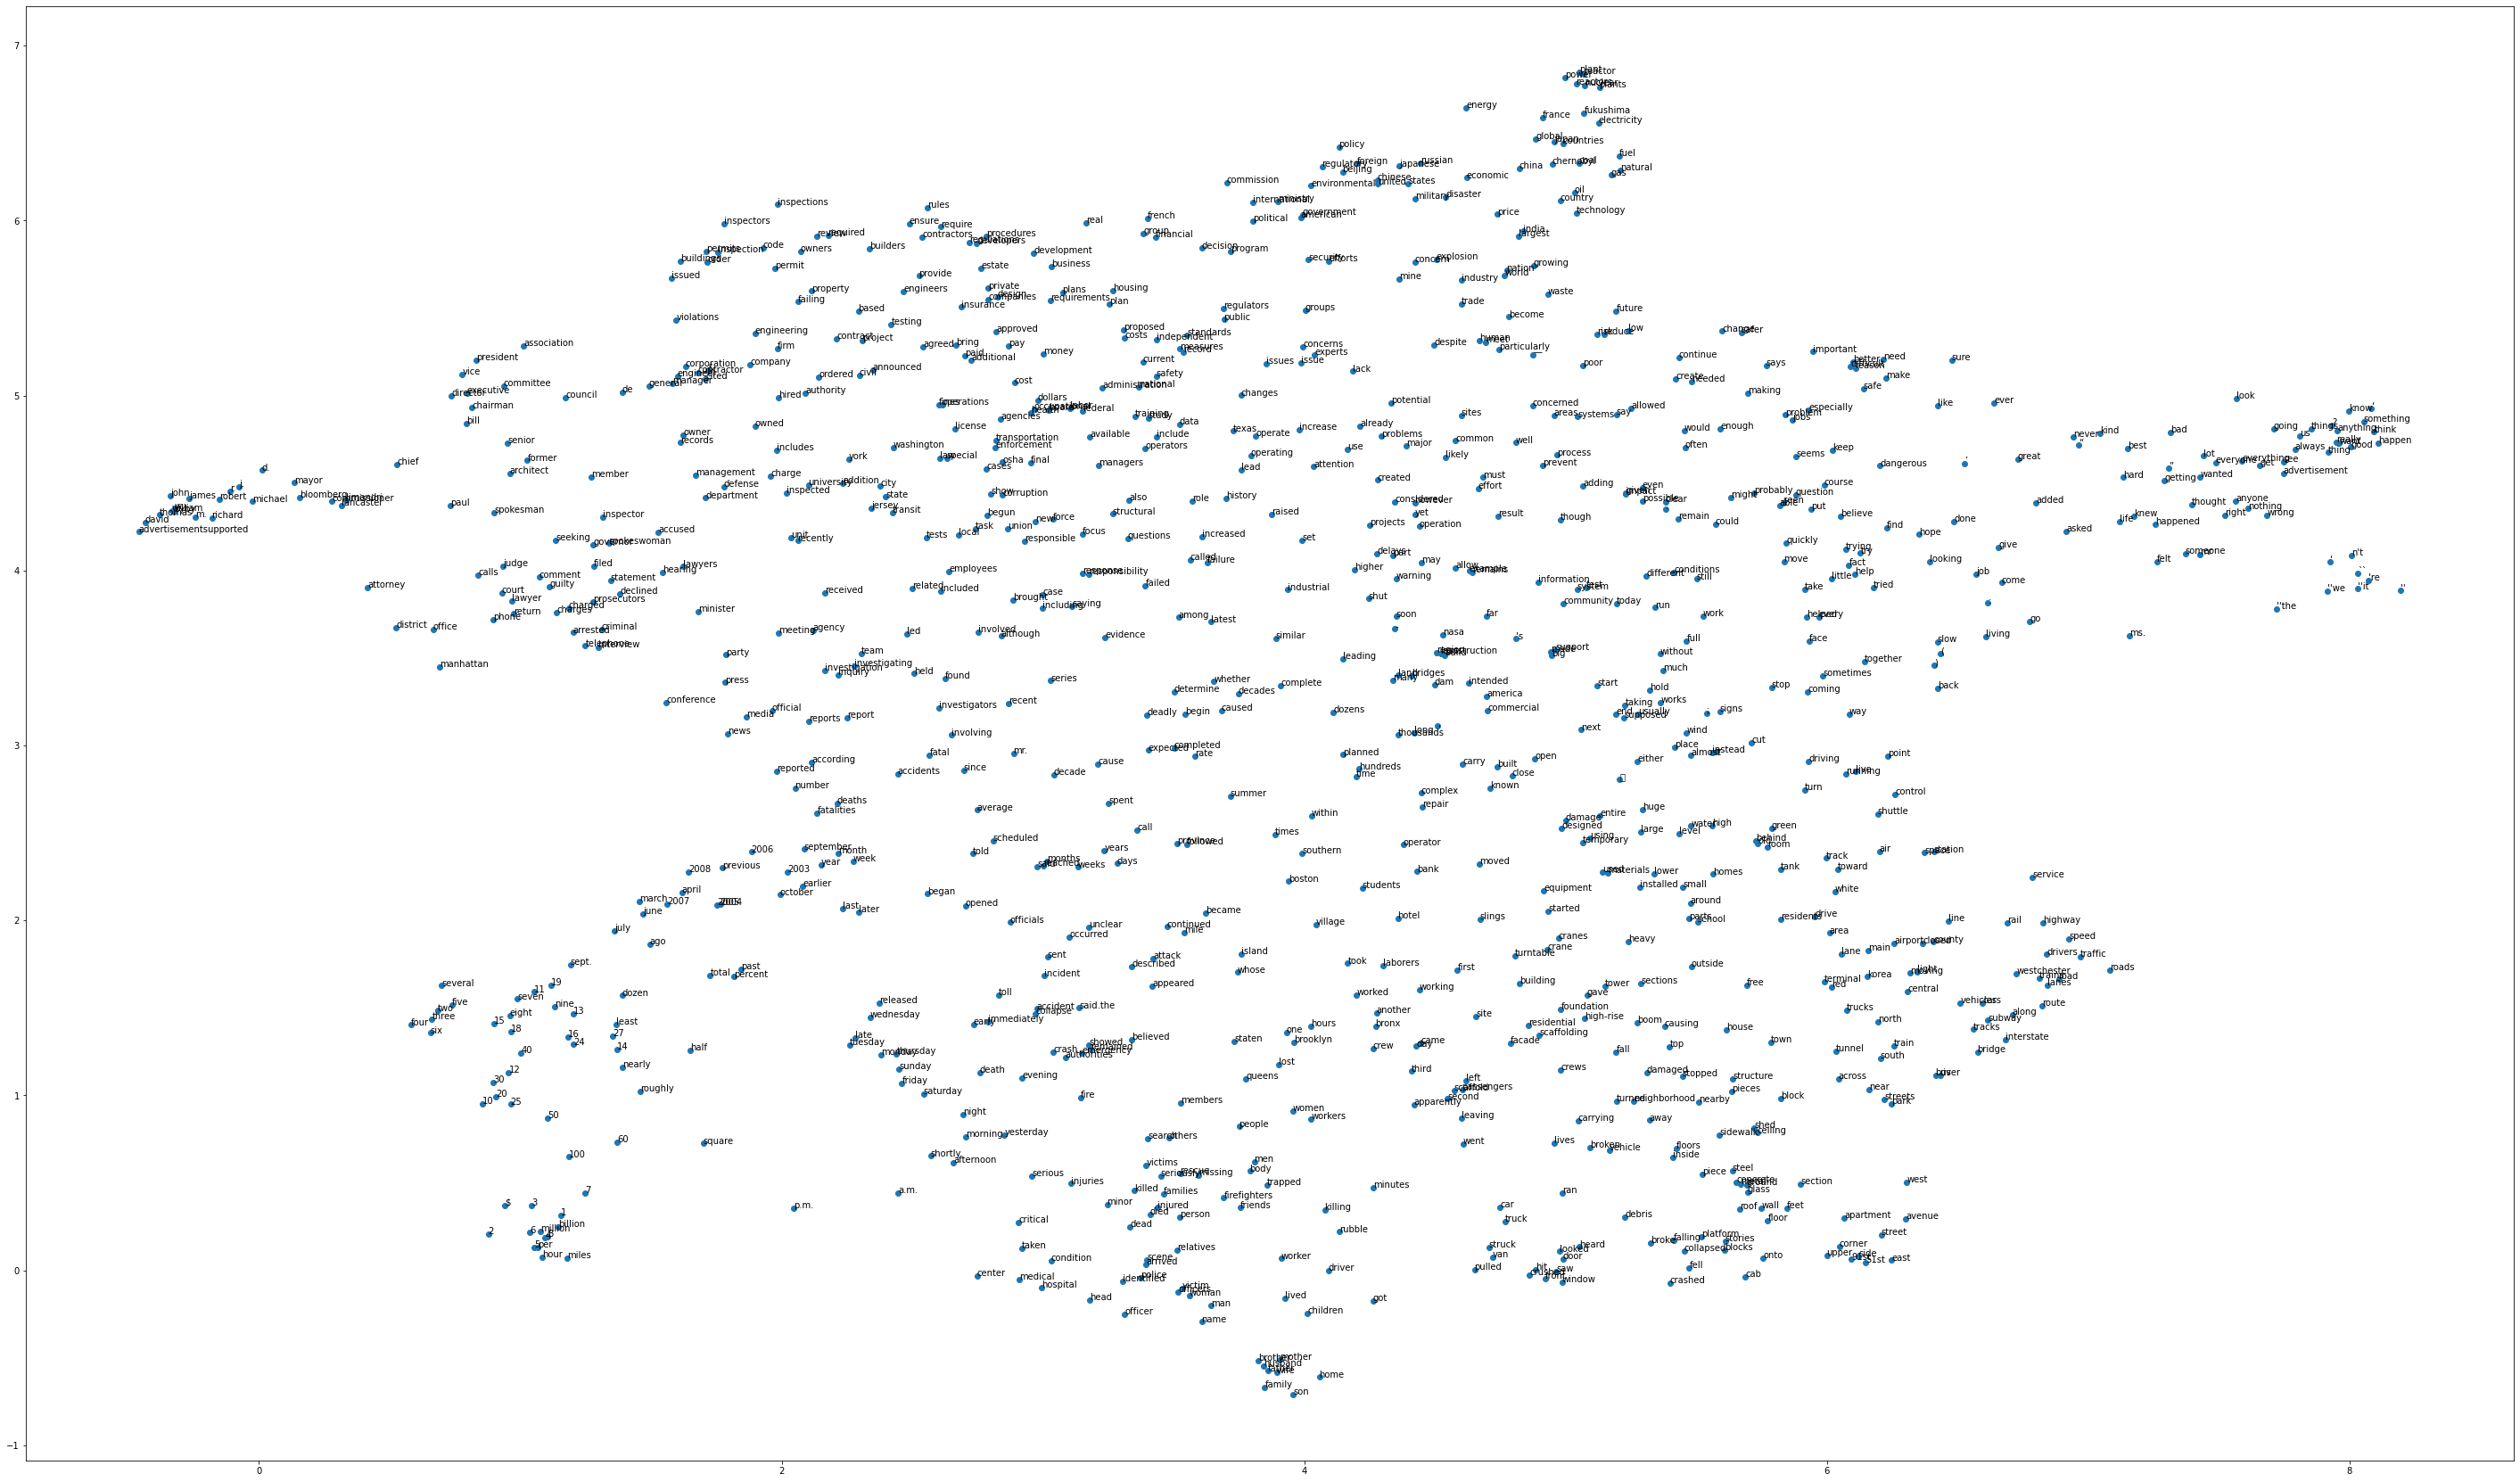

In [450]:
fig = plt.figure()
fig.set_size_inches(50,30)
ax = fig.add_subplot(1,1,1)

ax.scatter(df[0],df[1])

for i, txt in enumerate(X_l):
    ax.annotate(txt, (df.loc[i][0],df.loc[i][1]), fontsize=10)

In [419]:
for i, txt in enumerate(X_l) :
    print (i,txt)

0 advertisementsupported
1 workers
2 ,
3 many
4 continue
5 job
6 new
7 york
8 city
9 despite
10 safety
11 m.
12 week
13 accident
14 ’
15 wife
16 said
17 husband
18 bronx
19 construction
20 site
21 working
22 laborers
23 .
24 told
25 years
26 company
27 would
28 try
29 find
30 another
31 next
32 “
33 ”
34 ms.
35 everything
36 mr
37 killed
38 27
39 third
40 floor
41 building
42 body
43 hundreds
44 one
45 12
46 people
47 10
48 died
49 accidents
50 last
51 year
52 according
53 data
54 committee
55 occupational
56 health
57 group
58 department
59 buildings
60 number
61 deaths
62 past
63 four
64 death
65 sites
66 rules
67 regulations
68 like
69 mr.
70 families
71 left
72 behind
73 little
74 financial
75 created
76 2006
77 nearly
78 half
79 30
80 percent
81 union
82 economic
83 policy
84 think
85 tank
86 probably
87 50
88 less
89 likely
90 &
91 district
92 council
93 contractors
94 take
95 shortly
96 issued
97 stop
98 work
99 order
100 contractor
101 general
102 also
103 ordered
104 operation

In [154]:
X

array([[-1.6975714e-01,  1.7916358e-01, -3.4884891e-01, ...,
        -2.5053474e-01, -1.1585291e-01, -7.7142932e-02],
       [-4.9852192e-02, -2.0912236e-02,  3.8403731e-02, ...,
        -3.3594072e-01, -1.3347736e-02,  1.7051157e-02],
       [-7.4447744e-02, -1.4266576e-01,  2.6484062e-03, ...,
        -3.1327389e-02, -4.9299747e-02,  8.5472159e-02],
       ...,
       [-7.4138194e-02, -3.5954926e-02,  7.8329369e-03, ...,
        -1.2753695e-01, -4.3866485e-02, -2.1087691e-02],
       [-6.2366441e-02, -7.1721278e-02,  3.8058362e-03, ...,
        -1.1008024e-01, -5.4665603e-02,  3.1595281e-04],
       [-7.5448863e-02, -1.8042957e-02,  3.1514824e-06, ...,
        -1.3958773e-01, -5.4044969e-02, -1.8412422e-02]], dtype=float32)